In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import copy

In [2]:
image_filenames = ['mcon1.jpg', 'mcon2.jpg', 'mcon3.jpg', 'mcon4.jpg', 'mcon5.jpg', 'mcon6.jpg']
images_directory = "./images/electronics"
# images_directory = "/usercode/images/electronics"
# Load the images
images = [cv2.imread(os.path.join(images_directory, filename)) for filename in image_filenames]

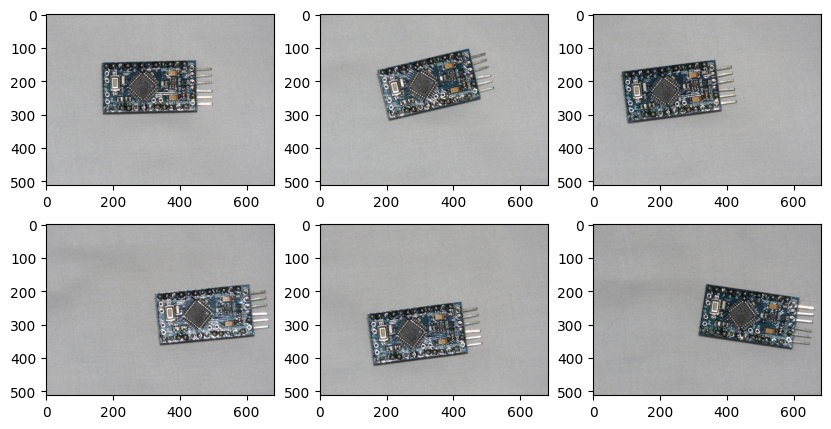

In [3]:
# Display the images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for img_ndx in range(6):
    axs[img_ndx//3, img_ndx%3].imshow(cv2.cvtColor(images[img_ndx], cv2.COLOR_BGR2RGB))

In [4]:
# Corner locations that we found in the previous exercise
corners_arr_list = [np.array([[168, 145], [449, 139], [453, 294], [170, 300]], dtype=np.float32),
np.array([[172, 166], [447, 104], [480, 256], [205, 319]], dtype=np.float32),
np.array([[87, 172], [366, 138], [385, 293], [104, 327]], dtype=np.float32),
np.array([[327, 209], [609, 181], [623, 337], [341, 364]], dtype=np.float32),
np.array([[143, 269], [424, 233], [442, 389], [160, 424]], dtype=np.float32),
np.array([[338, 180], [618, 220], [597, 376], [316, 335]], dtype=np.float32)]

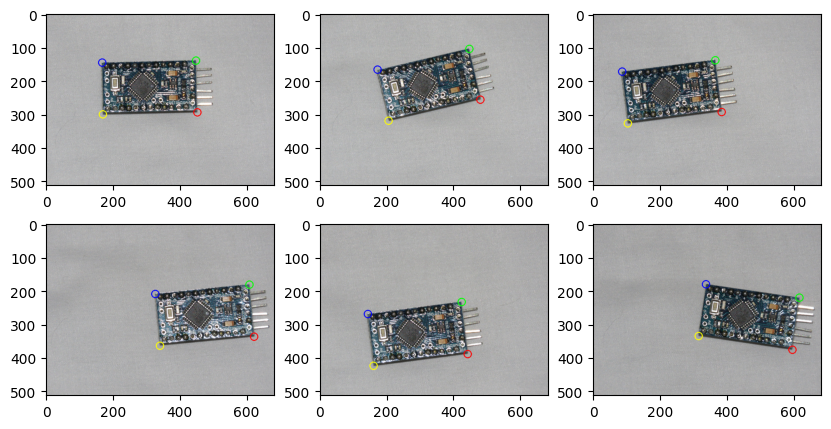

In [5]:
# Draw the corners
annotated_images = []
for img_ndx in range(len(images)):
    annotated_img = copy.deepcopy(images[img_ndx])
    # NW corner
    cv2.circle(annotated_img, corners_arr_list[img_ndx][0].astype(int), 11, (255, 0, 0), 2)
    # NE corner
    cv2.circle(annotated_img, corners_arr_list[img_ndx][1].astype(int), 11, (0, 255, 0), 2)
    # SE corner
    cv2.circle(annotated_img, corners_arr_list[img_ndx][2].astype(int), 11, (0, 0, 255), 2)
    # SW corner
    cv2.circle(annotated_img, corners_arr_list[img_ndx][3].astype(int), 11, (0, 255, 255), 2)
    annotated_images.append(annotated_img)
# Display the images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for img_ndx in range(6):
    axs[img_ndx//3, img_ndx%3].imshow(cv2.cvtColor(annotated_images[img_ndx], cv2.COLOR_BGR2RGB))

In [6]:
# Perspective transformation
# Define arbitrary points where the object corners will be mapped
warped_corners = np.array([[100, 300], [900, 300], [900, 700], [100, 700]], dtype=np.float32)
# Compute the perspective transformation matrix, for each image
warped_images = []
for image_ndx in range(len(images)):
    perspective_mtx = cv2.getPerspectiveTransform(corners_arr_list[image_ndx], warped_corners)
    # Create a warped image
    warped_image = cv2.warpPerspective(images[image_ndx], perspective_mtx, dsize=(1000, 1000))
    warped_images.append(warped_image)

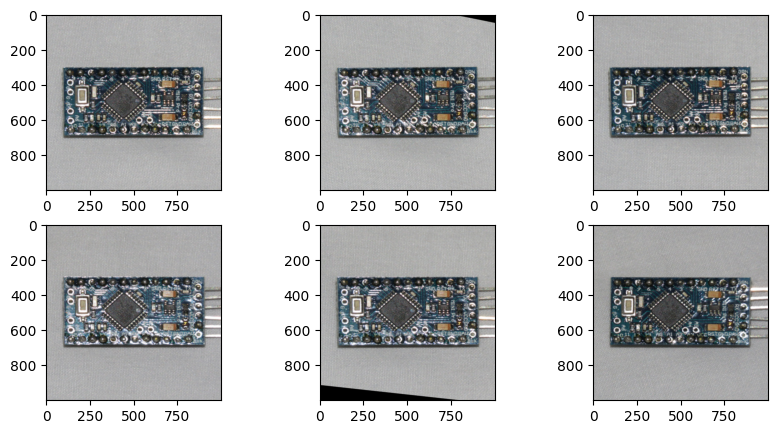

In [7]:
# Display the warped images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for img_ndx in range(6):
    axs[img_ndx//3, img_ndx%3].imshow(cv2.cvtColor(warped_images[img_ndx], cv2.COLOR_BGR2RGB))

In [10]:
# Mask everything except the central chip
central_chip_corners_in_warped_image = [[445, 365], [570, 490], [445, 615], [320, 490]]
masked_images = []
for image_ndx in range(len(warped_images)):
    mask = np.zeros(warped_images[image_ndx].shape, dtype=np.uint8)
    cv2.fillPoly(mask, np.array([central_chip_corners_in_warped_image]), (255, 255, 255))
    masked_image = np.minimum(warped_images[image_ndx], mask)
    masked_images.append(masked_image)

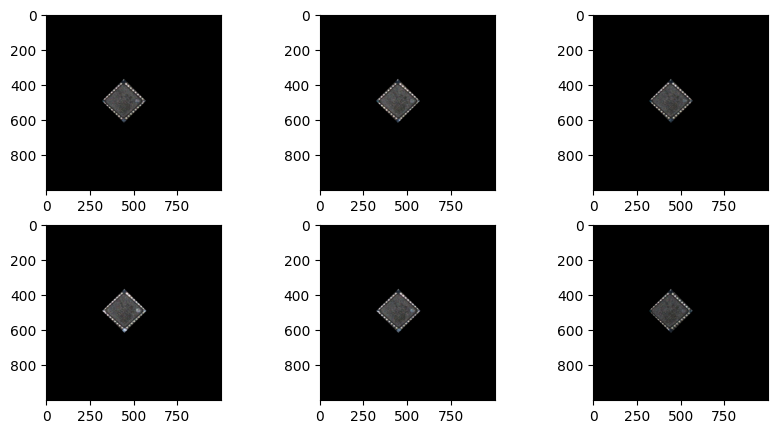

In [11]:
# Display the masked images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for img_ndx in range(6):
    axs[img_ndx//3, img_ndx%3].imshow(cv2.cvtColor(masked_images[img_ndx], cv2.COLOR_BGR2RGB))